In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

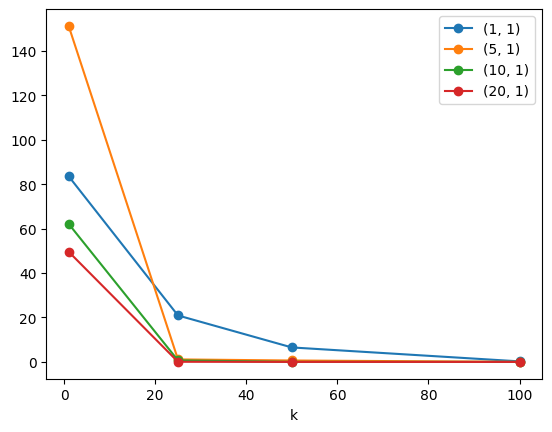

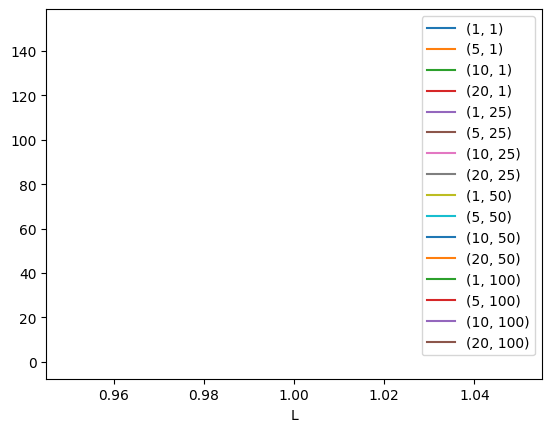

In [61]:
"""
Setup for experiment 1
Analyzing the variance of the unbiased estimators depending on (k, m, lag)
"""

fn_exp1 = "./results/exp_compare_estimators_2.pkl"
with open(fn_exp1, 'rb') as handle:
    exp1 = pickle.load(handle)

"""
n_samples = 1_000
ks = [1, 100, 200]
m_mults = [1, 10, 100]
lags = [1, 10, 100]"""

"""
ks = [1, 5, 10, 20, 50, 100]
m_mults = [1, 2, 4, 5, 10, 20]
lags = [1]
"""

ks = [1, 25, 50, 100]
m_mults = [1, 5, 10, 20]
lags = [1]

"""
Plot w.r.t to k for different lag and m_mult, 
the variance of the unbiased estimator
"""
for m_mult in m_mults:
    for lag in lags:
        plt.plot(ks, [np.var(exp1[k][m_mult*k][lag][1]) if lag <= k else -1. for k in ks], label=(m_mult, lag),marker='o')
plt.xlabel("k")
plt.legend()
plt.show()    

"""
Plot w.r.t to lag, for different k and m_mult,
the variance of the unbiased estimator
"""
for k in ks:
    for m_mult in m_mults:
        plt.plot(lags, [np.var(exp1[k][m_mult*k][lag][1]) if lag <= k else -1. for lag in lags], label=(m_mult, k))
plt.xlabel("L")
plt.legend()
plt.show()

Mean (target): 4.334000110626221
Mean (offset): 4.535000324249268
95% quantile (target): 11.0
95% quantile (offset): 14.0


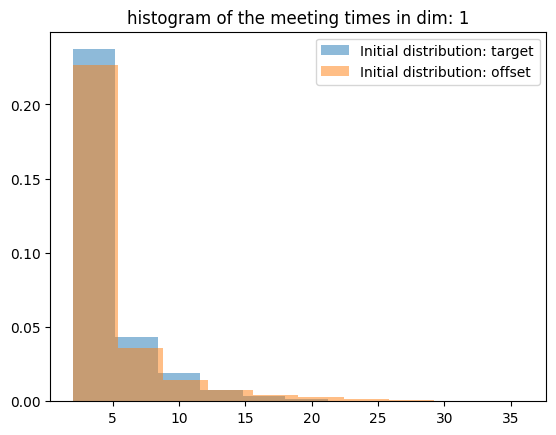

Mean (target): 10.37600040435791
Mean (offset): 14.92300033569336
95% quantile (target): 31.0
95% quantile (offset): 42.0


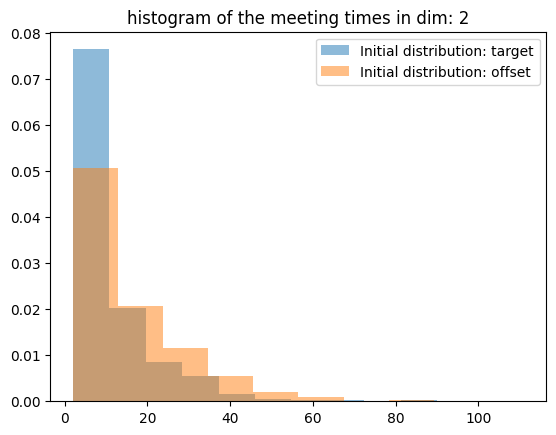

Mean (target): 25.595001220703125
Mean (offset): 38.98800277709961
95% quantile (target): 77.04999999999995
95% quantile (offset): 92.04999999999995


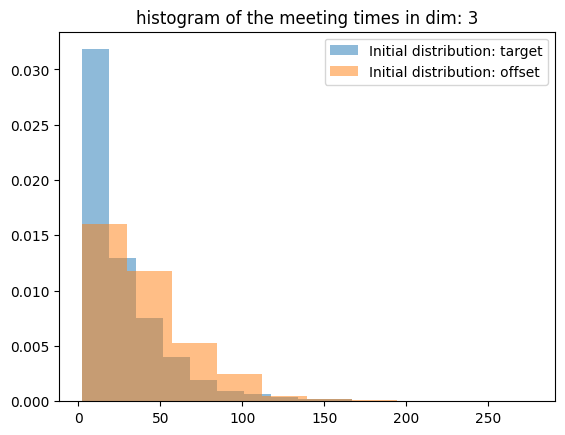

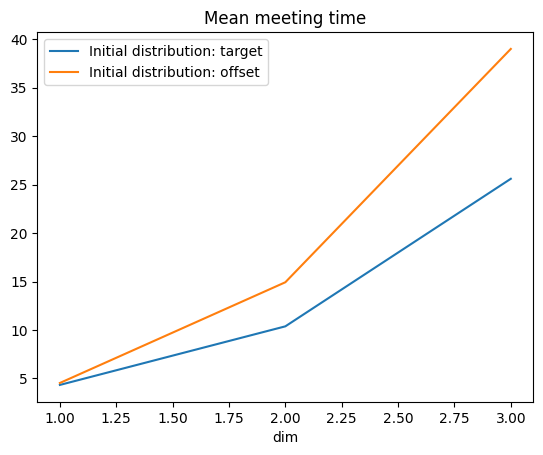

In [69]:
"""
Setup for experiment 2
Analyzing the histogram of the meeting times depending on the dimension
"""

fn_exp2 = ["./results/results_coupling_time_target_wrt_to_dim.pkl", "./results/results_coupling_time_offset_wrt_to_dim.pkl"]
with open(fn_exp2[0], 'rb') as handle:
    exp2 = pickle.load(handle)
with open(fn_exp2[1], 'rb') as handle:
    exp2_offset = pickle.load(handle)
    
k = 10
m = 10 * k
lag = 1
dims = [1, 2, 3]
for dim in dims:
    print(f"Mean (target): {exp2[dim][-1].mean()}")
    print(f"Mean (offset): {exp2_offset[dim][-1].mean()}")
    print(f"95% quantile (target): {np.quantile(exp2[dim][-1], 0.95)}")
    print(f"95% quantile (offset): {np.quantile(exp2_offset[dim][-1], 0.95)}")
    plt.hist(exp2[dim][-1], label="Initial distribution: target", alpha=0.5, bins=10, density=True)
    plt.hist(exp2_offset[dim][-1], label="Initial distribution: offset", alpha=0.5, bins=10, density=True)
    plt.title(f"histogram of the meeting times in dim: {dim}")
    plt.legend()
    plt.show()
plt.plot(dims, [exp2[dim][-1].mean() for dim in dims], label="Initial distribution: target")
plt.plot(dims, [exp2_offset[dim][-1].mean() for dim in dims], label="Initial distribution: offset")
plt.title("Mean meeting time")
plt.xlabel("dim")
plt.legend()
plt.show()

Mean (target): 300.91900634765625
95% quantile (target): 875.05


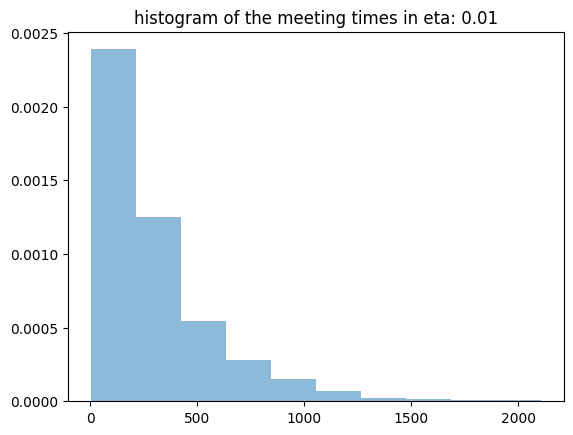

Mean (target): 161.62701416015625
95% quantile (target): 499.04999999999995


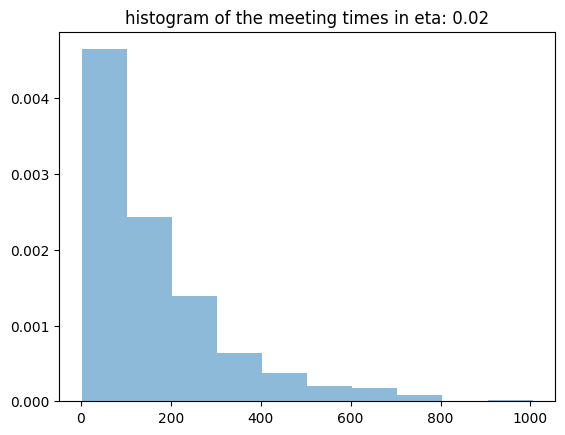

Mean (target): 105.84200286865234
95% quantile (target): 332.0999999999999


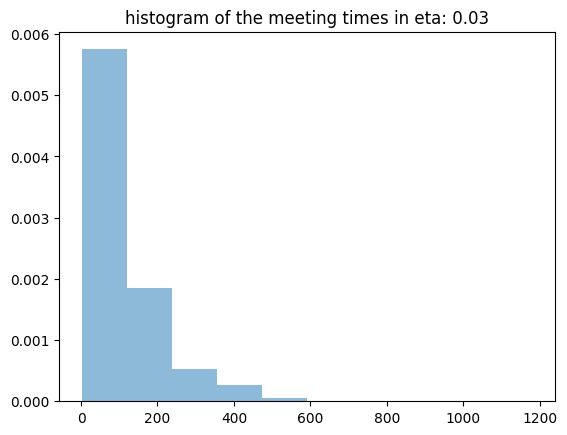

Mean (target): 81.13600158691406
95% quantile (target): 249.04999999999995


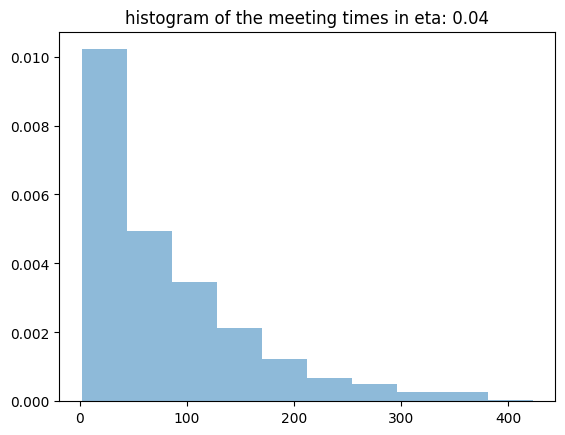

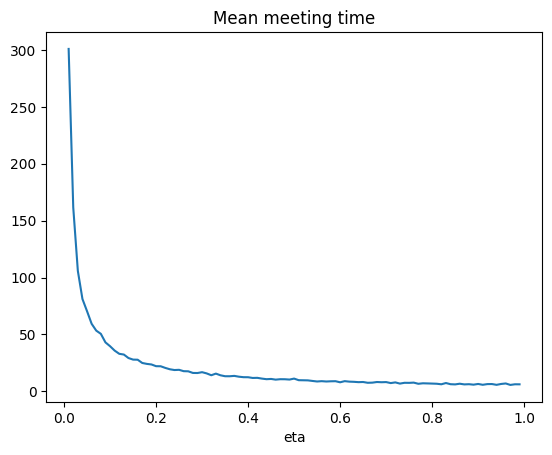

In [48]:
"""
Setup for experiment 3.
Evolution of the meeting time distribution with respect to eta.
"""

fn_exp3 = "./results/results_coupling_time_target_wrt_to_eta_bis.pkl"

with open(fn_exp3, 'rb') as handle:
    exp3 = pickle.load(handle)


etas = [k/100 for k in range(1, 100)]
k = 10
m = 10 * k
lag = 1
dim = 1


for eta in etas[:4]:
    print(f"Mean (target): {exp3[eta][-1].mean()}")
    print(f"95% quantile (target): {np.quantile(exp3[eta][-1], 0.95)}")
    plt.hist(exp3[eta][-1], alpha=0.5, bins=10, density=True)
    plt.title(f"histogram of the meeting times in eta: {eta}")
    plt.show()

plt.plot(etas, [exp3[eta][-1].mean() for eta in etas])
plt.title("Mean meeting time")
plt.xlabel("eta")
plt.show()

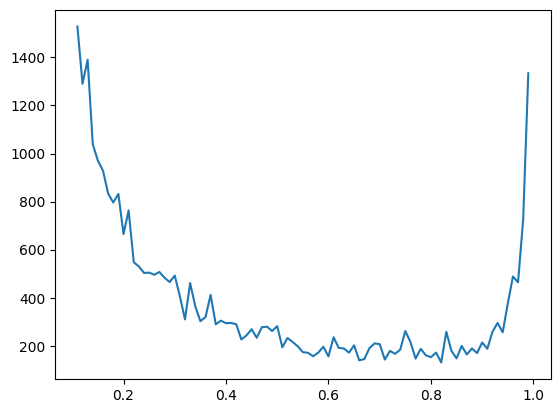

In [46]:
"""
Experiment 3. 
Bound on the variance of the cost
"""
var_etas = [exp3[eta][-1].var() for eta in etas]
mean_etas = [exp3[eta][-1].mean() for eta in etas]
var_costs = 2*np.array(etas)/(1-np.array(etas))*np.array(mean_etas)+np.array(var_etas)
plt.plot(etas[10:], var_costs[10:], label="Bound on the var. of the total cost")


In [ ]:
np.argmin(var_costs)
etas[np.argmin(var_costs)]